In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt

In [2]:
class zzN():
    def __init__(self, y, k_th = 0.01):
        #x should be a 2d array
        #k_th precentage is the amount of data to substract on top and bottom
        maxs = []
        mins = []
        meds = []
        x = copy.deepcopy(y)
        (self.row, self.column) = np.shape(x)

        median = np.median(x, axis = 0)
        for arr in median:
            meds.append(arr)
        
        if k_th <= 1.:
            k = int(np.ceil(k_th * self.row))
        else:
            k = k_th
        
        for i in range(self.column):
            max_temp,min_temp = [],[]
            j = 0
            while j < k:
                max_temp.append(np.max(x[:,i]))
                (x1, x2) = np.where(x[:,i:i+1] == max_temp[-1])
                amount = np.shape(x1)[0]
                j += amount
                x2 = np.tile([i], amount)
                x[(x1, x2)] = meds[i]
            j = 0
            while j < k:
                min_temp.append(np.min(x[:,i]))
                (x1, x2) = np.where(x[:,i:i+1] == min_temp[-1])
                amount = np.shape(x1)[0]
                j += amount
                x2 = np.tile([i], amount)
                x[(x1, x2)] = meds[i]
                
            while len(min_temp)<k:
                min_temp.append(min_temp[-1])
                
            while len(max_temp)<k:
                max_temp.append(max_temp[-1])
                
            maxs.append(max_temp)
            mins.append(min_temp)
        
        mins2 = np.array(mins).T
        maxs2 = np.array(maxs).T
        
        self.kmax = np.min(maxs2, axis = 0)
        self.kmin = np.max(mins2, axis = 0)
    
    def limi(self, x):
        x = np.select([x>=1, x>=0, x<0],[-np.e**(-x+1)+2, x, np.e**(x)-1])
        return x
    
    def unlimi(self, x):
        x = np.select([x>=1, x>=0, x<0],[1-np.log(2-x), x, np.log(x+1)])
        return x
    
    def __call__(self, x):
        x = (x - self.kmin)/(self.kmax - self.kmin + 1)
        x = self.limi(x)
        return x.astype('float32')
    
    def recover(self, x):
        x = self.unlimi(x)
        x = x*(self.kmax - self.kmin + 1) + self.kmin
        return x.astype('float32')

In [6]:
#Example Data
data1 = np.random.normal(size = [10000,5])*(np.random.normal(size = [5]) + 1)*100 + np.random.normal(size = [5])*600
data2 = np.random.normal(size = [1000,5])*(np.random.normal(size = [5]) + 1)*100 + np.random.normal(size = [5])*600
data3 = np.random.normal(size = [1000,5])*(np.random.normal(size = [5]) + 1)*100 + np.random.normal(size = [5])*600

data = np.concatenate((data1,data2,data3),axis = 0)
zzD = zzN(data)

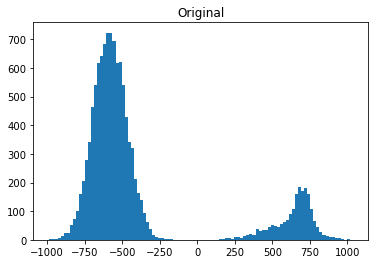

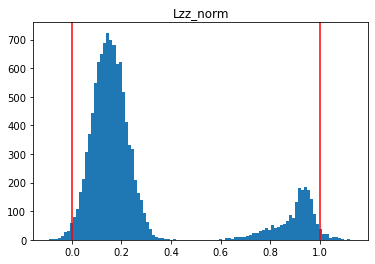

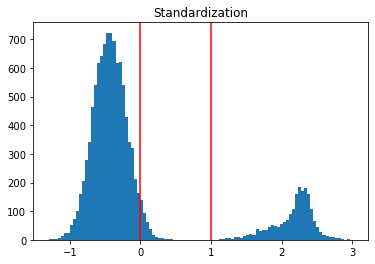

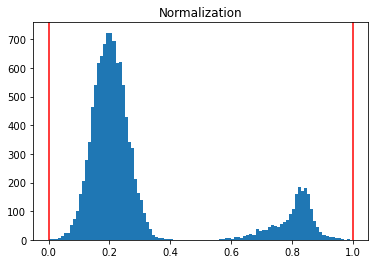

In [7]:
#Examples!
for i in range(1):
    plt.hist(data[:,i],bins = 100)
    plt.title('Original')
    plt.show()
    
    plt.hist(zzD(data)[:,i],bins = 100)
    plt.title('Lzz_norm')
    plt.axvline(1, c = 'red')
    plt.axvline(0, c = 'red')
    plt.show()
    
    plt.hist((data[:,i]-np.mean(data[:,i]))/np.std(data[:,i]),bins = 100)
    plt.title('Standardization')
    plt.axvline(1, c = 'red')
    plt.axvline(0, c = 'red')
    plt.show()
    
    plt.hist((data[:,i]-np.min(data[:,i]))/(np.max(data[:,i])-np.min(data[:,i])),bins = 100)
    plt.title('Normalization')
    plt.axvline(1, c = 'red')
    plt.axvline(0, c = 'red')
    plt.show()

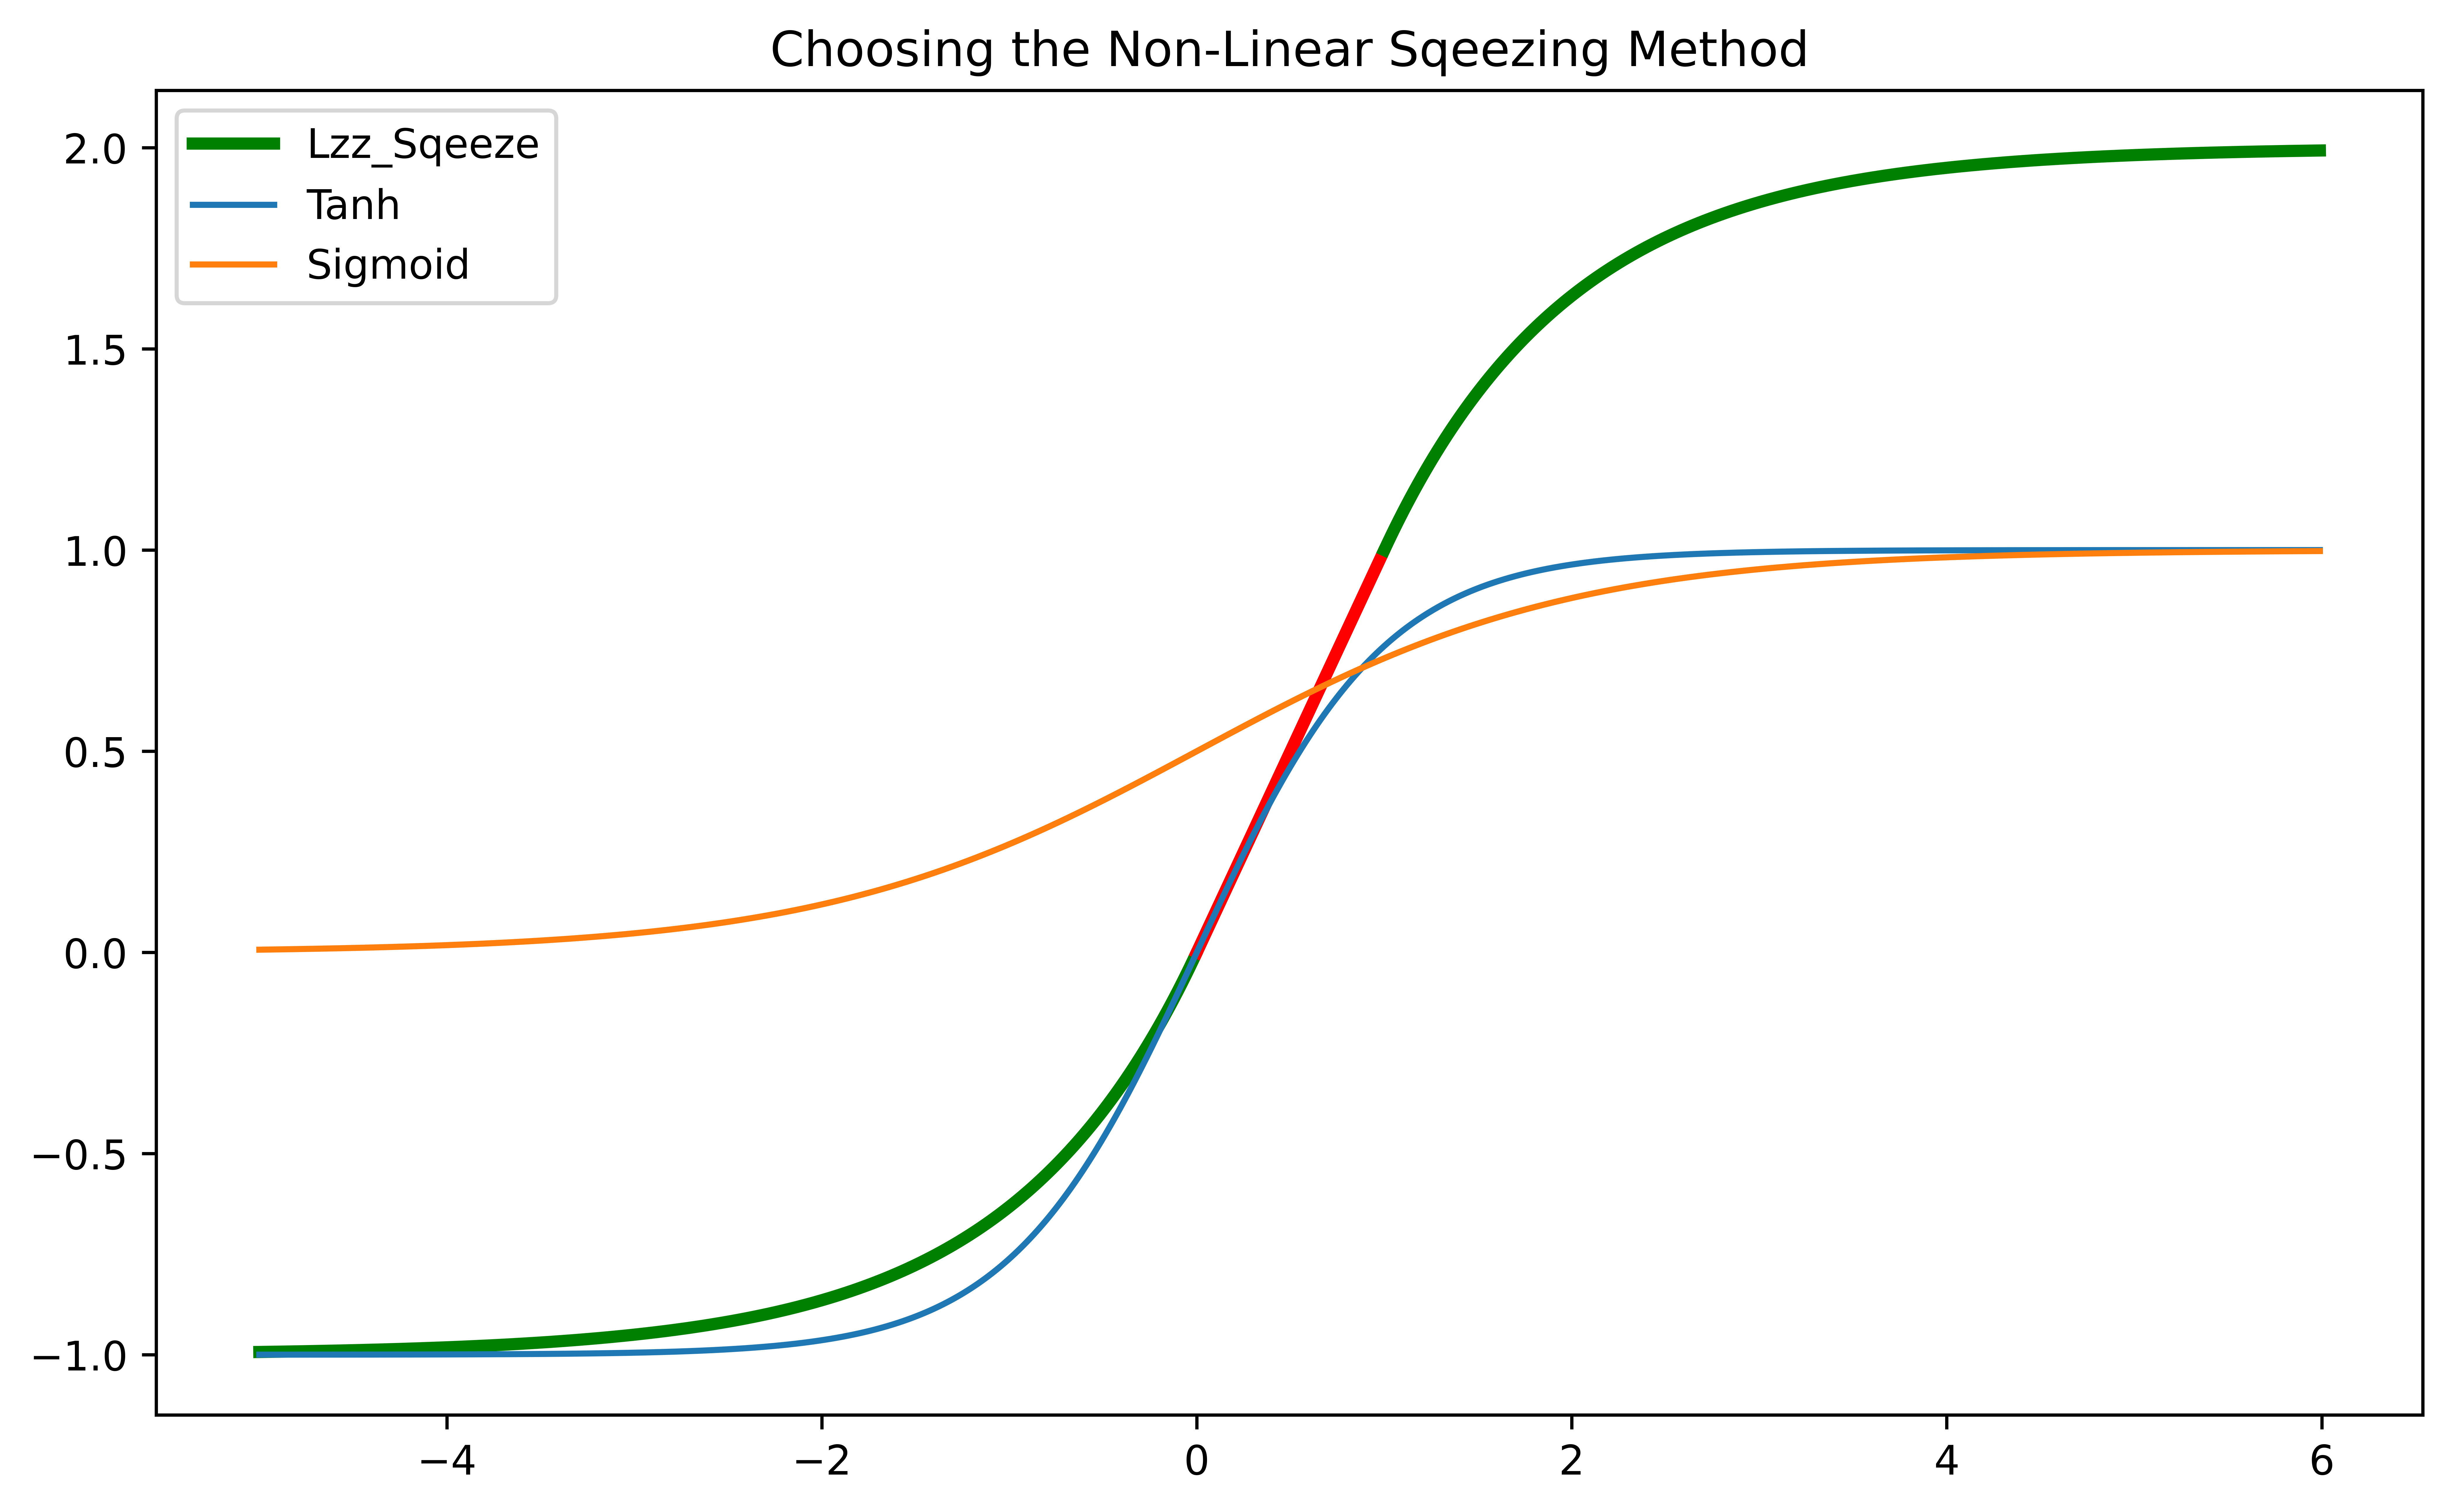

In [5]:
#Choosing the Non-Linear Sqeezing Method
x = np.arange(-5,6,0.01)
y = np.select([x>=1, x>=0, x<0],[-np.e**(-x+1)+2, x, np.e**(x)-1])
y2 = np.tanh(x)
y3 = 1/(1+np.e**(-x))
x = np.select([y>=1, y>=0, y<0],[1-np.log(2-y), y, np.log(y+1)])

plt.figure(figsize = [10,6],dpi = 1000)
plt.plot(x[:500],y[:500],linewidth = 3, c = 'g')
plt.plot(x[500:600],y[500:600],linewidth = 3, c = 'r')
plt.plot(x[600:],y[600:],linewidth = 3, c = 'g',label = 'Lzz_Sqeeze')
plt.plot(x,y2,label = 'Tanh')
plt.plot(x,y3,label = 'Sigmoid')
plt.title('Choosing the Non-Linear Sqeezing Method')
plt.legend()
plt.show()